<a href="https://colab.research.google.com/github/GiX7000/action-recognition-with-CNNs/blob/main/human_recognition_pseudo_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all libraries
#!pip install tensorflow
!pip install tensorflow[and-cuda]
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
#write here the model architecture
model = models.Sequential()

model.add(layers.Conv2D(16,(3,3) ,padding='valid', activation='relu' ,kernel_constraint=max_norm(max_value=2), input_shape=(25,149,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3) ,padding='same',activation='relu', kernel_constraint=max_norm(max_value=2)))
model.add(layers.Conv2D(32,(3,3) ,padding='valid',activation='relu', kernel_constraint=max_norm(max_value=2)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3) ,padding='valid',activation='relu', kernel_constraint=max_norm(max_value=2)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='selu'))

#Change based on the classes we have!
model.add(layers.Dense(11,activation = 'softmax'))

model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 23, 147, 16)         │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 73, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 73, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 71, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 35, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 2, 33, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,451 (646.29 KB)

 Trainable params: 165,451 (646.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# in case you want to use colab use this
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
train_dir = "/content/gdrive/MyDrive/DEMOKRITOS/perantonis/pseudo_rgb_exp/Datasets/PKU/PKU_M_CAMERA_TRAIN_TEST_VAL/train"
val_dir = "/content/gdrive/MyDrive/DEMOKRITOS/perantonis/pseudo_rgb_exp/Datasets/PKU/PKU_M_CAMERA_TRAIN_TEST_VAL/validation"
test_dir = "/content/gdrive/MyDrive/DEMOKRITOS/perantonis/pseudo_rgb_exp/Datasets/PKU/PKU_M_CAMERA_TRAIN_TEST_VAL/test"

In [ ]:
#------------------Data preprocessing--------------------#
#load images for train and validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
start = time.perf_counter()
batchSize = 32
train_datagen= ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
		train_dir,
		target_size=(25,149),
		batch_size=batchSize,
		classes =['eat_meal_snack','falling','handshaking','hugging_other_person','make_a_phone_call_answer_phone',
		'playing_with_phone_tablet','reading','sitting_down','standing_up','typing_on_a_keyboard','wear_jacket'])

validation_generator = test_datagen.flow_from_directory(
		val_dir,
		target_size=(25,149),
		batch_size=batchSize,
		classes =['eat_meal_snack','falling','handshaking','hugging_other_person','make_a_phone_call_answer_phone',
		'playing_with_phone_tablet','reading','sitting_down','standing_up','typing_on_a_keyboard','wear_jacket'])

Found 1339 images belonging to 11 classes.
Found 57 images belonging to 11 classes.


In [ ]:
#command to train the model
history = model.fit(
		train_generator,
		steps_per_epoch= train_generator.samples // batchSize,
		epochs=34,
		validation_data =validation_generator,
		validation_steps= validation_generator.samples // batchSize ,shuffle=True)



Epoch 1/34


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 297s 6s/step - accuracy: 0.1548 - loss: 2.3896 - val_accuracy: 0.2188 - val_loss: 2.0804
Epoch 2/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2812 - loss: 2.1584 - val_accuracy: 0.2000 - val_loss: 2.2477
Epoch 3/34


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 423ms/step - accuracy: 0.3288 - loss: 1.8781
Epoch 4/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2500 - loss: 2.0375 - val_accuracy: 0.4375 - val_loss: 1.5450
Epoch 5/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 345ms/step - accuracy: 0.3964 - loss: 1.6322 - val_accuracy: 0.3200 - val_loss: 2.0918
Epoch 6/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.5625 - loss: 1.4171
Epoch 7/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 326ms/step - accuracy: 0.4491 - loss: 1.5683 - val_accuracy: 0.3750 - val_loss: 1.6591
Epoch 8/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.7070 - val_accuracy: 0.2400 - val_loss: 1.9246
Epoch 9/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - accuracy: 0.5100 - loss: 1.4361
Epoch 10/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5000 - loss: 1.6101 - val_accuracy: 0.4375 - val_loss: 1.6871
Epoch 11/34
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 335ms/step - accuracy: 0.5077 - loss: 1.4252 - val_accuracy: 0.5200 - v

In [ ]:
#load images for test and calculate the accuracy
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(25,149),
                batch_size=batchSize,
                classes =['eat_meal_snack','falling','handshaking','hugging_other_person','make_a_phone_call_answer_phone',
		'playing_with_phone_tablet','reading','sitting_down','standing_up','typing_on_a_keyboard','wear_jacket'])

test_loss, test_acc = model.evaluate(
                test_generator,
                steps=test_generator.samples // batchSize)
print('test acc:', test_acc)

Found 106 images belonging to 11 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.8164 - loss: 1.1395
test acc: 0.8125


In [ ]:
import matplotlib.pyplot as plt

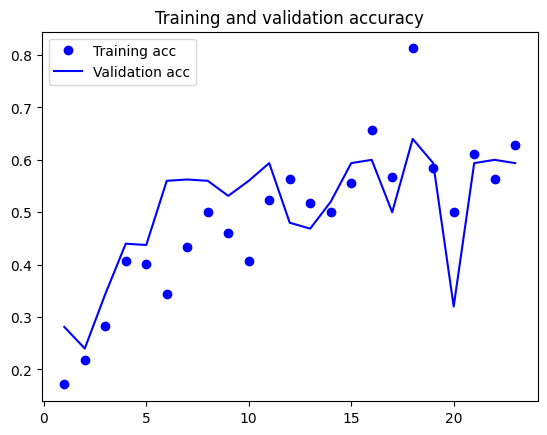

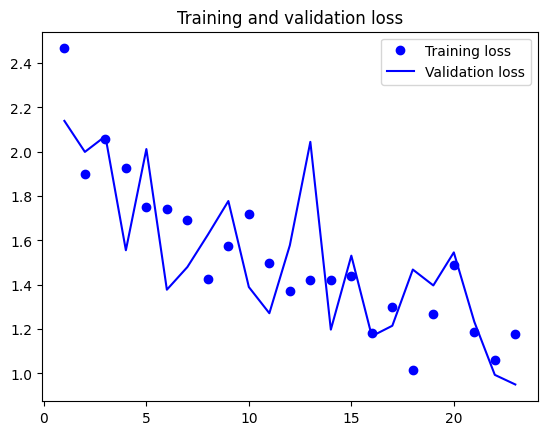

In [ ]:
#Diagram to use for trainning
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the minimum length of acc and val_acc to make sure epochs match both
epochs = range(1, min(len(acc), len(val_acc)) + 1)

# Use the same range for plotting both accuracy and loss
plt.plot(epochs, acc[:len(epochs)], 'bo', label='Training acc')  # Slice acc to match epochs length
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss[:len(epochs)], 'bo', label='Training loss') # Slice loss to match epochs length
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#time to run
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)


Elapsed 3089.229 seconds.


In [ ]:
#print the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 23, 147, 16)         │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 73, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 73, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 71, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 35, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 33, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,904 (1.26 MB)

 Trainable params: 165,451 (646.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,453 (646.30 KB)

In [ ]:
print('test acc:', test_acc)

test acc: 0.65625


In [ ]:
#save the trained model
model.save('Human_test.h5')